# Context

- Offering discounts has always been a popular way to entice more sales for a company, especially for products of limited supply. However, it is not as effective for SaaS companies where customers know that supply of the software is unlimited in principle.
Source: https://www.paddle.com/blog/discount-pricing

- This can result in a situation where you need to constantly offer discounts to keep otherwise uninterested clients, who at this point will undervalue your product, to stay, which takes away attention from other, more ideal clients and confuse your business strategy (are you a low-cost SaaS company or a premium one, for example). Source: https://medium.com/@arpit-mishra/saas-discount-strategy-strategic-move-or-slippery-slope-56c55ad20edc#:~:text=Overdo%20it%2C%20and%20you%20risk,actual%20worth%20of%20your%20service.

## Problem Statement

The dataset has info on transactions for a SaaS Company.

Given the context, we will assess the effectiveness of discounts for this SaaS company, as well as out the worst offenders, by asking the following questions:

- Is offering discounts to clients working to increase number of transactions and/or size of transactions?
- At what discount level do discounts start eating into the profits?
- Where are we applying the most discounts? And how is that affecting profits and number of sales?

The intent of this project is:

- To see if the application of discounts by this company has been effective.
- Suggest tactics to better use discounts for future transactions.

Note:
- The dataframe analyzed goes from 4 Jan 2020 to 31 Dec 2023.
- We focus only on the effect of discounts on profits and transaction count here.
- We will assume that ‘Sales’ refers to gross income, before discount is applied.
- We only group the data by country and companies, as there are enough unique values in those categories to ensure the correlations aren’t affected badly by outliers.
- The Profit/Loss and Sales Columns have no Currency sign. To avoid misrepresenting this dataset, I have not added any myself.

# Necessary Installs and Imports

In [95]:
# Prep imports and pip installs
!pip install missingno


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [96]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

# Data Understanding Phase

## Analysis of Unaltered Dataset

In [97]:
SaaS = pd.read_csv('SaaS-Sales.csv').drop(columns=['Row ID'])
SaaS.head()

,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


In [98]:
# Checking data types of all columns
SaaS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      9994 non-null   object 
 1   Order Date    9994 non-null   object 
 2   Date Key      9994 non-null   int64  
 3   Contact Name  9994 non-null   object 
 4   Country       9994 non-null   object 
 5   City          9994 non-null   object 
 6   Region        9994 non-null   object 
 7   Subregion     9994 non-null   object 
 8   Customer      9994 non-null   object 
 9   Customer ID   9994 non-null   int64  
 10  Industry      9994 non-null   object 
 11  Segment       9994 non-null   object 
 12  Product       9994 non-null   object 
 13  License       9994 non-null   object 
 14  Sales         9994 non-null   float64
 15  Quantity      9994 non-null   int64  
 16  Discount      9994 non-null   float64
 17  Profit        9994 non-null   float64
dtypes: float64(3), int64(3), obj

### Result of Preliminary Analysis:
- Row ID can be removed, as there is already an index in place.
- Date key can be removed: It is a restructuring of the order date, and is not likely to be needed in the visualization phase.
- Order Date must be turned into datetime.
- Profit column should be renamed into Profit/Loss, as it shows both profit and loss of each order.
- Region and subregion can be removed: City and country locations do the same job.

In [99]:
AnalysisSaaS = pd.read_csv('SaaS-Sales.csv').drop(columns=['Row ID','Order ID','Date Key','Region','Subregion'])
AnalysisSaaS = AnalysisSaaS.rename(columns = {'Profit':'Profit/Loss'})
AnalysisSaaS['Order Date'] = pd.to_datetime(AnalysisSaaS['Order Date'])
AnalysisSaaS.head()

,Order Date,Contact Name,Country,City,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit/Loss
0,2022-11-09,Nathan Bell,Ireland,Dublin,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2022-11-09,Nathan Bell,Ireland,Dublin,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,2022-06-13,Deirdre Bailey,United States,New York City,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,2021-10-11,Zoe Hodges,Germany,Stuttgart,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,2021-10-11,Zoe Hodges,Germany,Stuttgart,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


In [100]:
# Re-checking data types of all columns
AnalysisSaaS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    9994 non-null   datetime64[ns]
 1   Contact Name  9994 non-null   object        
 2   Country       9994 non-null   object        
 3   City          9994 non-null   object        
 4   Customer      9994 non-null   object        
 5   Customer ID   9994 non-null   int64         
 6   Industry      9994 non-null   object        
 7   Segment       9994 non-null   object        
 8   Product       9994 non-null   object        
 9   License       9994 non-null   object        
 10  Sales         9994 non-null   float64       
 11  Quantity      9994 non-null   int64         
 12  Discount      9994 non-null   float64       
 13  Profit/Loss   9994 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(8)
memory usage: 1.1+ MB


## Checking for Duplicates

In [101]:
# Checking for duplicates
SaaS[SaaS.duplicated(keep=False)]
# RESULT: No duplicates detected

,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit


# Checking Unique Values per Column for Any 'Hidden' Missingno (NaN)

'Hidden', i.e. values such as '?', 'unknown', etc that also mean NaN but are not registered as NaN by the system

In [102]:
# Finding the different types of values in the Product column
NaNChecker = []
for i in AnalysisSaaS:
    NaNChecker.append( [i, AnalysisSaaS[i].nunique(), AnalysisSaaS[i].unique()])

Result = pd.DataFrame(columns=['Column', 'Number of Unique Values', 'All Unique Values'],
                     data=NaNChecker)
Result

,Column,Number of Unique Values,All Unique Values
0,Order Date,1237,"[2022-11-09 00:00:00, 2022-06-13 00:00:00, 202..."
1,Contact Name,793,"[Nathan Bell, Deirdre Bailey, Zoe Hodges, Thom..."
2,Country,48,"[Ireland, United States, Germany, Sweden, Cana..."
3,City,262,"[Dublin, New York City, Stuttgart, Stockholm, ..."
4,Customer,99,"[Chevron, Phillips 66, Royal Dutch Shell, BNP ..."
5,Customer ID,99,"[1017, 1056, 1031, 1065, 1062, 1066, 1074, 108..."
6,Industry,10,"[Energy, Finance, Tech, Healthcare, Manufactur..."
7,Segment,3,"[SMB, Strategic, Enterprise]"
8,Product,14,"[Marketing Suite, FinanceHub, ContactMatcher, ..."
9,License,9994,"[16GRM07R1K, QLIW57KZUV, JI6BVL70HQ, DE9GJKGD4..."


In [103]:
AnalysisSaaS.isna().count()

Order Date      9994
Contact Name    9994
Country         9994
City            9994
Customer        9994
Customer ID     9994
Industry        9994
Segment         9994
Product         9994
License         9994
Sales           9994
Quantity        9994
Discount        9994
Profit/Loss     9994
dtype: int64

In [104]:
# Checking all unique values in more detail
for i in AnalysisSaaS:
    print(i)
    print(f'{AnalysisSaaS[i].unique()}\n')

Order Date
<DatetimeArray>
['2022-11-09 00:00:00', '2022-06-13 00:00:00', '2021-10-11 00:00:00',
 '2020-06-09 00:00:00', '2023-04-16 00:00:00', '2022-12-06 00:00:00',
 '2021-11-22 00:00:00', '2020-11-11 00:00:00', '2020-05-13 00:00:00',
 '2020-08-27 00:00:00',
 ...
 '2022-10-12 00:00:00', '2020-06-18 00:00:00', '2023-03-01 00:00:00',
 '2021-05-09 00:00:00', '2020-11-06 00:00:00', '2021-12-29 00:00:00',
 '2020-04-03 00:00:00', '2022-06-04 00:00:00', '2021-04-12 00:00:00',
 '2020-01-22 00:00:00']
Length: 1237, dtype: datetime64[ns]

Contact Name
['Nathan Bell' 'Deirdre Bailey' 'Zoe Hodges' 'Thomas Hodges'
 'Adrian Hunter' 'Adrian Abraham' 'Emily Morrison' 'Claire Welch'
 'Carol Campbell' 'Blake Hughes' 'Melanie Sharp' 'Luke Bower'
 'Jonathan Ferguson' 'Sam Parsons' 'Neil Gill' 'Amelia Campbell'
 'Chloe Short' 'Jasmine Metcalfe' 'Karen Mathis' 'Dylan Dickens'
 'Sophie Lewis' 'Gavin Mitchell' 'Katherine Dowd' 'Harry Brown'
 'Brian Dickens' 'Joseph Newman' 'Nicola Howard' 'Stewart Wilson'
 

# Checking Most and Least Profitable Customers and Countries

In [105]:
AnalysisSaaS.groupby(SaaS['Customer']).agg({'Profit/Loss':'median','Sales':'count'}).sort_values(by = 'Profit/Loss',ascending=False)

,Profit/Loss,Sales
Customer,,
Glencore,16.5939,56
Trafigura Group,14.6642,103
Fannie Mae,14.2878,102
Caterpillar,13.0869,86
Home Depot,13.0284,95
...,...,...
Exxon Mobil,5.3148,60
BNP Paribas,5.2074,156
Marathon Petroleum,4.8986,79


In [106]:
AnalysisSaaS.groupby(SaaS['Country']).agg({'Profit/Loss':'median','Sales':'count'}).sort_values(by = 'Profit/Loss',ascending=False)

,Profit/Loss,Sales
Country,,
Slovenia,100.19600,1
Egypt,67.65990,11
Denmark,30.73400,8
Italy,25.10085,110
Brazil,24.22560,255
Israel,23.80800,39
China,23.68080,105
Ireland,23.67925,126
Singapore,23.53605,66


# Describing Dataframe

In [107]:
Preliminary = AnalysisSaaS.describe().T
Preliminary

,count,mean,min,25%,50%,75%,max,std
Order Date,9994,2022-05-01 00:07:12.259355648,2020-01-04 00:00:00,2021-05-23 00:00:00,2022-06-27 00:00:00,2023-05-15 00:00:00,2023-12-31 00:00:00,NaN
Customer ID,9994.0,1049.771963,1001.0,1024.0,1049.0,1076.0,1101.0,29.719388
Sales,9994.0,229.858001,0.444,17.28,54.49,209.94,22638.48,623.245101
Quantity,9994.0,3.789574,1.0,2.0,3.0,5.0,14.0,2.22511
Discount,9994.0,0.156203,0.0,0.0,0.2,0.2,0.8,0.206452
Profit/Loss,9994.0,28.656896,-6599.978,1.72875,8.6665,29.364,8399.976,234.260108


In [108]:
Preliminary['IQR'] = Preliminary['75%'] - Preliminary['25%']
Preliminary['Upper_Bound'] = Preliminary['75%'] + 1.5 * Preliminary['IQR']
Preliminary['Lower_Bound'] = Preliminary['25%'] - 1.5 * Preliminary['IQR']
Preliminary

,count,mean,min,25%,50%,75%,max,std,IQR,Upper_Bound,Lower_Bound
Order Date,9994,2022-05-01 00:07:12.259355648,2020-01-04 00:00:00,2021-05-23 00:00:00,2022-06-27 00:00:00,2023-05-15 00:00:00,2023-12-31 00:00:00,NaN,722 days 00:00:00,2026-05-02 00:00:00,2018-06-05 00:00:00
Customer ID,9994.0,1049.771963,1001.0,1024.0,1049.0,1076.0,1101.0,29.719388,52.0,1154.0,946.0
Sales,9994.0,229.858001,0.444,17.28,54.49,209.94,22638.48,623.245101,192.66,498.93,-271.71
Quantity,9994.0,3.789574,1.0,2.0,3.0,5.0,14.0,2.22511,3.0,9.5,-2.5
Discount,9994.0,0.156203,0.0,0.0,0.2,0.2,0.8,0.206452,0.2,0.5,-0.3
Profit/Loss,9994.0,28.656896,-6599.978,1.72875,8.6665,29.364,8399.976,234.260108,27.63525,70.816875,-39.724125


# Checking for Outliers

## Via Tables

In this case we are not checking the details of the entries, rather we are checking how many of them there are.

In [109]:
Outliers = AnalysisSaaS[(AnalysisSaaS['Profit/Loss'] > Preliminary['Upper_Bound']['Profit/Loss']) | (AnalysisSaaS['Profit/Loss'] < Preliminary['Lower_Bound']['Profit/Loss'])]
Outliers.sort_values(by='Profit/Loss', ascending=False)

,Order Date,Contact Name,Country,City,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit/Loss
6826,2022-10-03,Nicholas Skinner,India,Mumbai,Coca-Cola,1021,Consumer Products,Strategic,Alchemy,XRU3UJD9JB,17499.950,5,0.0,8399.9760
8153,2023-03-24,Cameron MacLeod,Canada,Toronto,Mondelez International,1067,Consumer Products,SMB,Alchemy,LKBTOXAMTV,13999.960,4,0.0,6719.9808
4190,2023-11-18,Austin Peters,Philippines,Manila,Lowes,1060,Retail,SMB,Alchemy,VMQF7AQCQI,10499.970,3,0.0,5039.9856
9039,2022-12-18,Carolyn Parr,Brazil,São Paulo,Valero Energy,1093,Energy,SMB,ContactMatcher,VTADHKI6Q5,9892.740,13,0.0,4946.3700
4098,2020-09-23,Deirdre McDonald,Luxembourg,Luxembourg,Anthem,1029,Healthcare,SMB,ContactMatcher,TBTJ3FL8AN,9449.950,5,0.0,4630.4755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991,2023-12-08,Ruth Vaughan,Australia,Sydney,Ford Motor,1009,Manufacturing,Strategic,ContactMatcher,WWN9Y458G2,1889.990,5,0.8,-2929.4845
3011,2023-04-18,Joshua Vaughan,Russia,Moscow,FedEx,1036,Transportation,Enterprise,Big Ol Database,UN48B3LEBM,2549.985,5,0.7,-3399.9800
9774,2020-07-26,Lily Bond,Japan,Osaka,Bosch,1076,Tech,SMB,ContactMatcher,FT1VQ5PHAG,2177.584,8,0.8,-3701.8928
683,2023-11-05,Emily Fisher,Sweden,Gothenburg,Costco Wholesale,1025,Retail,Strategic,Big Ol Database,BT5A3EPA0H,7999.980,4,0.5,-3839.9904


In [110]:
OutliersSales = AnalysisSaaS[(AnalysisSaaS['Sales'] > Preliminary['Upper_Bound']['Sales']) | (AnalysisSaaS['Sales'] < Preliminary['Lower_Bound']['Sales'])]
OutliersSales.sort_values(by='Profit/Loss', ascending=False)

,Order Date,Contact Name,Country,City,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit/Loss
6826,2022-10-03,Nicholas Skinner,India,Mumbai,Coca-Cola,1021,Consumer Products,Strategic,Alchemy,XRU3UJD9JB,17499.950,5,0.0,8399.9760
8153,2023-03-24,Cameron MacLeod,Canada,Toronto,Mondelez International,1067,Consumer Products,SMB,Alchemy,LKBTOXAMTV,13999.960,4,0.0,6719.9808
4190,2023-11-18,Austin Peters,Philippines,Manila,Lowes,1060,Retail,SMB,Alchemy,VMQF7AQCQI,10499.970,3,0.0,5039.9856
9039,2022-12-18,Carolyn Parr,Brazil,São Paulo,Valero Energy,1093,Energy,SMB,ContactMatcher,VTADHKI6Q5,9892.740,13,0.0,4946.3700
4098,2020-09-23,Deirdre McDonald,Luxembourg,Luxembourg,Anthem,1029,Healthcare,SMB,ContactMatcher,TBTJ3FL8AN,9449.950,5,0.0,4630.4755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991,2023-12-08,Ruth Vaughan,Australia,Sydney,Ford Motor,1009,Manufacturing,Strategic,ContactMatcher,WWN9Y458G2,1889.990,5,0.8,-2929.4845
3011,2023-04-18,Joshua Vaughan,Russia,Moscow,FedEx,1036,Transportation,Enterprise,Big Ol Database,UN48B3LEBM,2549.985,5,0.7,-3399.9800
9774,2020-07-26,Lily Bond,Japan,Osaka,Bosch,1076,Tech,SMB,ContactMatcher,FT1VQ5PHAG,2177.584,8,0.8,-3701.8928
683,2023-11-05,Emily Fisher,Sweden,Gothenburg,Costco Wholesale,1025,Retail,Strategic,Big Ol Database,BT5A3EPA0H,7999.980,4,0.5,-3839.9904


In [111]:
OutliersDiscount = AnalysisSaaS[(AnalysisSaaS['Discount'] > Preliminary['Upper_Bound']['Discount']) | (AnalysisSaaS['Discount'] < Preliminary['Lower_Bound']['Discount'])]
OutliersDiscount.sort_values(by='Profit/Loss', ascending=False)

,Order Date,Contact Name,Country,City,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit/Loss
4711,2020-03-31,Nicola Pullman,France,Paris,ConocoPhillips,1024,Energy,SMB,ContactMatcher,70I5FHTYWV,0.852,1,0.7,-0.5964
1106,2022-11-20,Sam Parsons,Japan,Tokyo,Siemens,1043,Manufacturing,SMB,SaaS Connector Pack,O2GN0MDUL6,2.328,2,0.6,-0.7566
8561,2022-12-24,Richard Davidson,Japan,Tokyo,Intel,1051,Tech,Strategic,SaaS Connector Pack,163FNFPCND,2.328,2,0.6,-0.7566
976,2023-07-10,Sally Wallace,Belgium,Brussels,Tyson Foods,1088,Consumer Products,SMB,ContactMatcher,YA54YUPF60,1.080,2,0.7,-0.7920
4933,2021-09-28,Pippa Brown,Russia,Moscow,Volkswagen,1046,Manufacturing,SMB,ContactMatcher,OD72U7BESH,1.080,2,0.7,-0.7920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3151,2021-12-15,Sean Rees,Mexico,Monterrey,Walgreens,1095,Retail,SMB,Big Ol Database,PUDE08EA7R,1799.994,2,0.7,-2639.9912
4991,2023-12-08,Ruth Vaughan,Australia,Sydney,Ford Motor,1009,Manufacturing,Strategic,ContactMatcher,WWN9Y458G2,1889.990,5,0.8,-2929.4845
3011,2023-04-18,Joshua Vaughan,Russia,Moscow,FedEx,1036,Transportation,Enterprise,Big Ol Database,UN48B3LEBM,2549.985,5,0.7,-3399.9800
9774,2020-07-26,Lily Bond,Japan,Osaka,Bosch,1076,Tech,SMB,ContactMatcher,FT1VQ5PHAG,2177.584,8,0.8,-3701.8928


In [112]:
OutliersQuantity = AnalysisSaaS[(AnalysisSaaS['Quantity'] > Preliminary['Upper_Bound']['Quantity']) | (AnalysisSaaS['Quantity'] < Preliminary['Lower_Bound']['Quantity'])]
OutliersQuantity.sort_values(by='Profit/Loss', ascending=False)

,Order Date,Contact Name,Country,City,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit/Loss
9039,2022-12-18,Carolyn Parr,Brazil,São Paulo,Valero Energy,1093,Energy,SMB,ContactMatcher,VTADHKI6Q5,9892.740,13,0.0,4946.3700
3295,2023-10-02,Harry Buckland,United Kingdom,London,News Corp.,1071,Misc,Enterprise,Big Ol Database,7RF9YXZEY0,1704.890,11,0.0,767.2005
251,2022-09-12,Penelope Nash,United States,Seattle,Home Depot,1047,Retail,SMB,Data Smasher,4LV39UJCC2,3347.370,13,0.0,636.0003
6099,2023-09-21,Irene Walsh,United Kingdom,London,Wells Fargo,1099,Finance,SMB,FinanceHub,3Z6T4L1UGM,2888.127,11,0.1,609.7157
7846,2021-09-27,Molly Turner,Spain,Valencia,Kroger,1057,Retail,SMB,Site Analytics,7Y6L8JAHXX,1871.880,12,0.0,561.5640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8084,2021-10-26,Zoe Avery,Belgium,Brussels,Apple,1008,Tech,Strategic,Marketing Suite - Gold,GG6BG8I0S8,718.640,10,0.2,-161.6940
7783,2022-11-05,Carol Ball,Sweden,Stockholm,Nestle,1089,Consumer Products,Strategic,ContactMatcher,3Z9DZDK4RN,876.300,10,0.4,-292.1000
341,2020-04-13,Tim Morrison,France,Paris,General Motors,1041,Manufacturing,Strategic,ContactMatcher,CDPVLL2H9E,509.970,10,0.7,-407.9760
949,2023-11-29,Gordon Greene,France,Paris,Lowes,1060,Retail,Enterprise,ContactMatcher,EMNTDJ0A6G,2065.320,12,0.4,-619.5960


## Via Graphs

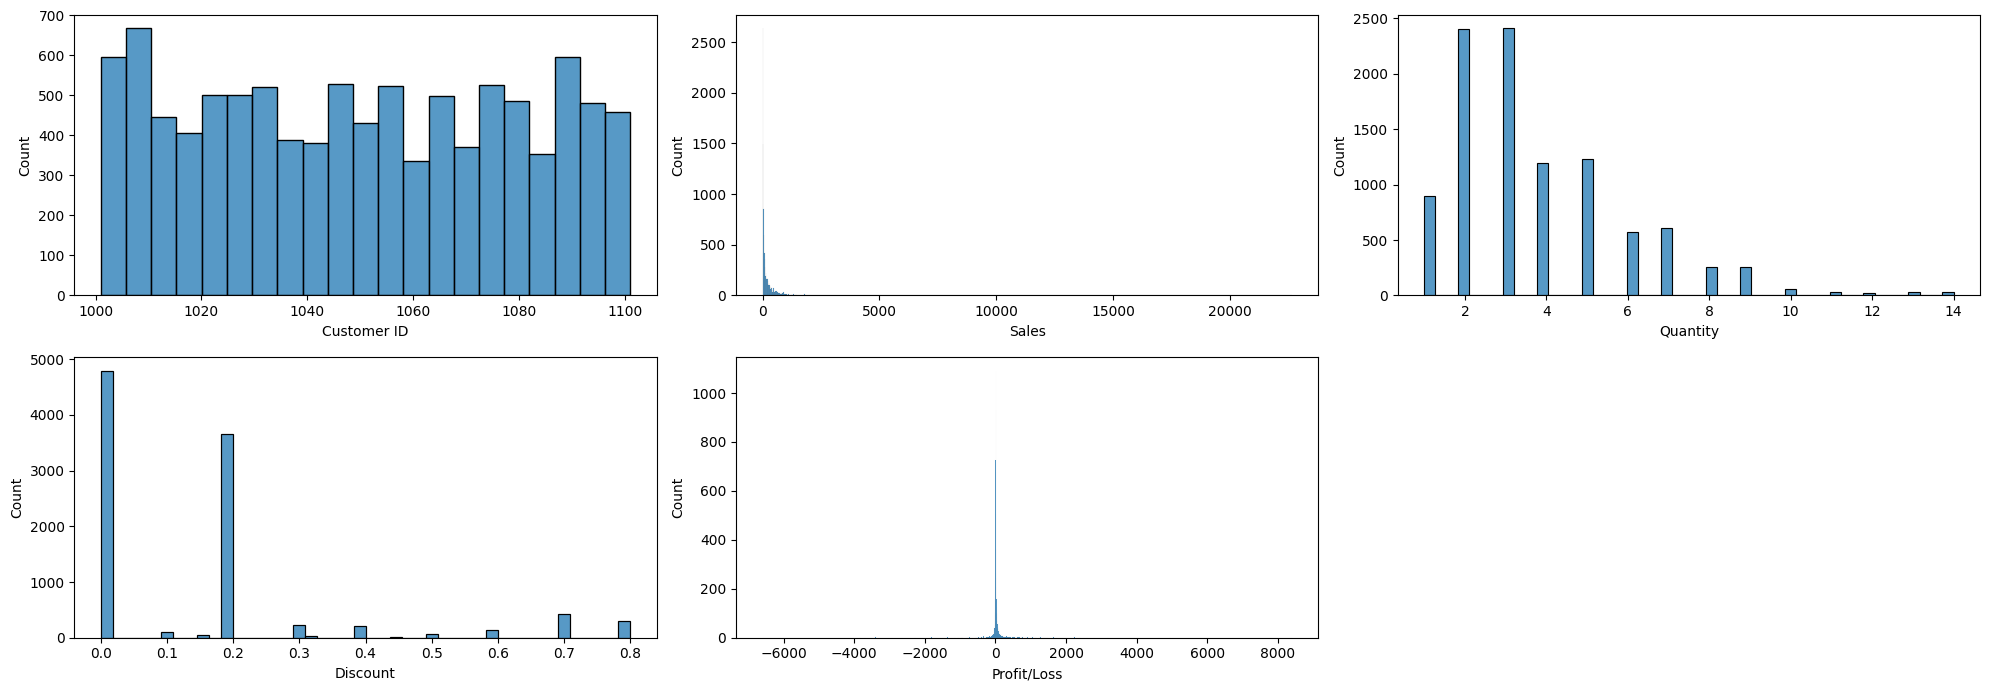

In [113]:
plt.figure(figsize=(20,10))
pos = 1
for each in AnalysisSaaS.select_dtypes(include = 'number'):
  plt.subplot(3, 3, pos)
  sns.histplot(data=AnalysisSaaS, x=each, kde=False)
  pos += 1
  plt.tight_layout()

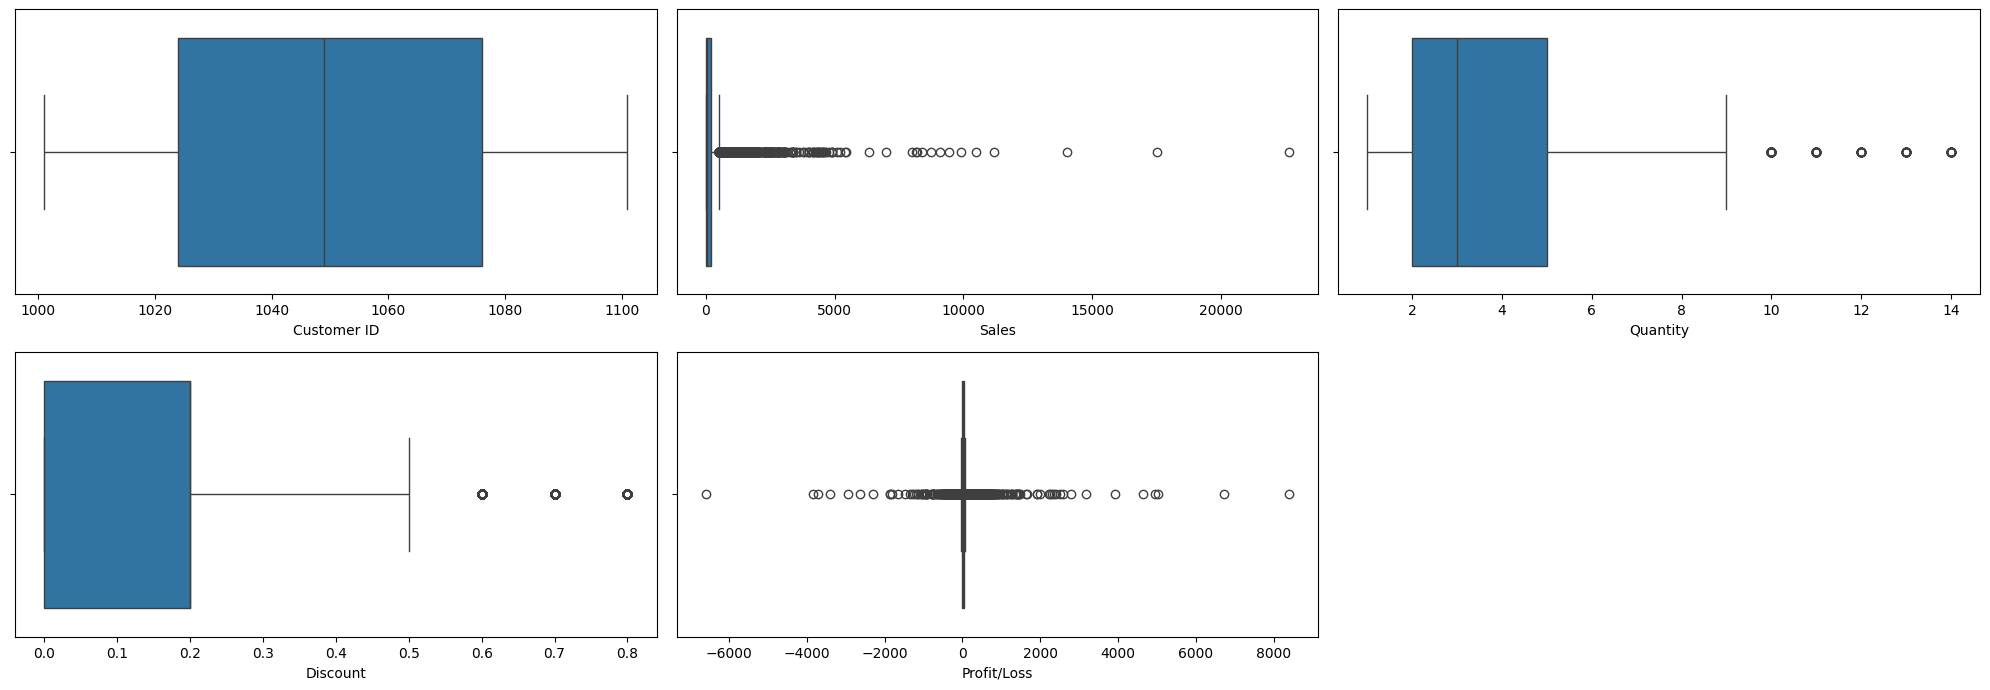

In [114]:
plt.figure(figsize=(20,10))
pos = 1
for each in AnalysisSaaS.select_dtypes(include = 'number'):
  plt.subplot(3, 3, pos)
  sns.boxplot(data=AnalysisSaaS, x=each)
  pos += 1
  plt.tight_layout()

There are so many outliers that deleting them all will not make sense. Hence, we will only be deleting the outliers that are not bunched up (i.e. in the very extremes of the plots), EXCEPT FOR:

- Customer ID, which is only there for identification purposes.
- Quantity, as these are discreet values that can all still be useful in analysis.
- Discount, for the same reason.

# Data Cleaning Phase

## Removing Outliers

After visually assessing the outliers in the boxplots and the tables, the following outliers will be removed, on the grounds that they are isolated enough from the other outliers:
- Top 6 and bottom 7 of the Profit/Loss Columns
- Sales will be removed after visually re-assessing the outliers after removing the Profit/Loss outliers

In [115]:
ProfitDrop = SaaS.sort_values(by='Profit', ascending=False).head(6).index
SaaS.sort_values(by='Profit', ascending=False).head(10)

,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
6826,APJ-2022-118689,10/3/2022,20221003,Nicholas Skinner,India,Mumbai,APJ,IND,Coca-Cola,1021,Consumer Products,Strategic,Alchemy,XRU3UJD9JB,17499.950,5,0.0,8399.9760
8153,AMER-2023-140151,3/24/2023,20230324,Cameron MacLeod,Canada,Toronto,AMER,NAMER,Mondelez International,1067,Consumer Products,SMB,Alchemy,LKBTOXAMTV,13999.960,4,0.0,6719.9808
4190,APJ-2023-166709,11/18/2023,20231118,Austin Peters,Philippines,Manila,APJ,APAC,Lowes,1060,Retail,SMB,Alchemy,VMQF7AQCQI,10499.970,3,0.0,5039.9856
9039,AMER-2022-117121,12/18/2022,20221218,Carolyn Parr,Brazil,São Paulo,AMER,LATAM,Valero Energy,1093,Energy,SMB,ContactMatcher,VTADHKI6Q5,9892.740,13,0.0,4946.3700
4098,EMEA-2020-116904,9/23/2020,20200923,Deirdre McDonald,Luxembourg,Luxembourg,EMEA,EU-WEST,Anthem,1029,Healthcare,SMB,ContactMatcher,TBTJ3FL8AN,9449.950,5,0.0,4630.4755
2623,EMEA-2023-127180,10/23/2023,20231023,Jennifer Payne,United Kingdom,London,EMEA,UKIR,Trafigura Group,1100,Finance,Enterprise,Alchemy,KPFKTCVVDH,11199.968,4,0.2,3919.9888
509,EMEA-2021-145352,3/16/2021,20210316,Eric Forsyth,Finland,Helsinki,EMEA,NOR,Lukoil,1044,Energy,SMB,ContactMatcher,B8THW7YZWV,6354.950,5,0.0,3177.4750
8488,EMEA-2022-158841,2/2/2022,20220202,Jane Stewart,Spain,Valencia,EMEA,EU-WEST,Honda Motor,1045,Manufacturing,SMB,Big Ol Database,3D2PQROYNM,8749.950,5,0.0,2799.9840
7666,EMEA-2022-140158,10/5/2022,20221005,Julian Short,Norway,Oslo,EMEA,NOR,Glencore,1083,Misc,Enterprise,Alchemy,2SGM1W6IZA,5399.910,9,0.0,2591.9568
6520,AMER-2023-138289,1/17/2023,20230117,Sophie Murray,Brazil,Rio de Janeiro,AMER,LATAM,Alphabet,1053,Tech,SMB,ContactMatcher,EZE6LFNTH1,5443.960,4,0.0,2504.2216


In [116]:
AnalysisSaaS.drop(ProfitDrop, inplace = True)

In [117]:
LossDrop = SaaS.sort_values(by='Profit', ascending=False).tail(7).index
SaaS.sort_values(by='Profit', ascending=False).tail(10)

,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
2697,EMEA-2020-145317,3/18/2020,20200318,Diane Murray,Germany,Berlin,EMEA,EU-WEST,Anthem,1029,Healthcare,Enterprise,Big Ol Database,SGJPOTVE6H,22638.480,6,0.5,-1811.0784
1199,APJ-2022-130946,4/9/2022,20220409,Pippa Brown,Japan,Tokyo,APJ,JAPN,Volkswagen,1046,Manufacturing,SMB,ContactMatcher,FX4GHHQ4MG,1088.792,4,0.8,-1850.9464
9639,EMEA-2021-116638,1/28/2021,20210128,Rebecca Wilson,Sweden,Gothenburg,EMEA,NOR,Morgan Stanley,1068,Finance,SMB,ContactMatcher,MENYXXSXEX,4297.644,13,0.4,-1862.3124
5310,APJ-2023-131254,11/20/2023,20231120,Carl Langdon,Japan,Tokyo,APJ,JAPN,Itochu,1032,Finance,SMB,ContactMatcher,68L961MMX4,1525.188,6,0.8,-2287.7820
3151,AMER-2021-147830,12/15/2021,20211215,Sean Rees,Mexico,Monterrey,AMER,LATAM,Walgreens,1095,Retail,SMB,Big Ol Database,PUDE08EA7R,1799.994,2,0.7,-2639.9912
4991,APJ-2023-122714,12/8/2023,20231208,Ruth Vaughan,Australia,Sydney,APJ,ANZ,Ford Motor,1009,Manufacturing,Strategic,ContactMatcher,WWN9Y458G2,1889.990,5,0.8,-2929.4845
3011,EMEA-2023-134845,4/18/2023,20230418,Joshua Vaughan,Russia,Moscow,EMEA,EU-EAST,FedEx,1036,Transportation,Enterprise,Big Ol Database,UN48B3LEBM,2549.985,5,0.7,-3399.9800
9774,APJ-2020-169019,7/26/2020,20200726,Lily Bond,Japan,Osaka,APJ,JAPN,Bosch,1076,Tech,SMB,ContactMatcher,FT1VQ5PHAG,2177.584,8,0.8,-3701.8928
683,EMEA-2023-168116,11/5/2023,20231105,Emily Fisher,Sweden,Gothenburg,EMEA,NOR,Costco Wholesale,1025,Retail,Strategic,Big Ol Database,BT5A3EPA0H,7999.980,4,0.5,-3839.9904
7772,AMER-2022-108196,11/26/2022,20221126,Faith Campbell,Mexico,Tijuana,AMER,LATAM,Allstate,1003,Finance,SMB,Big Ol Database,PM66ENV0DN,4499.985,5,0.7,-6599.9780


In [118]:
AnalysisSaaS.drop(LossDrop, inplace = True)

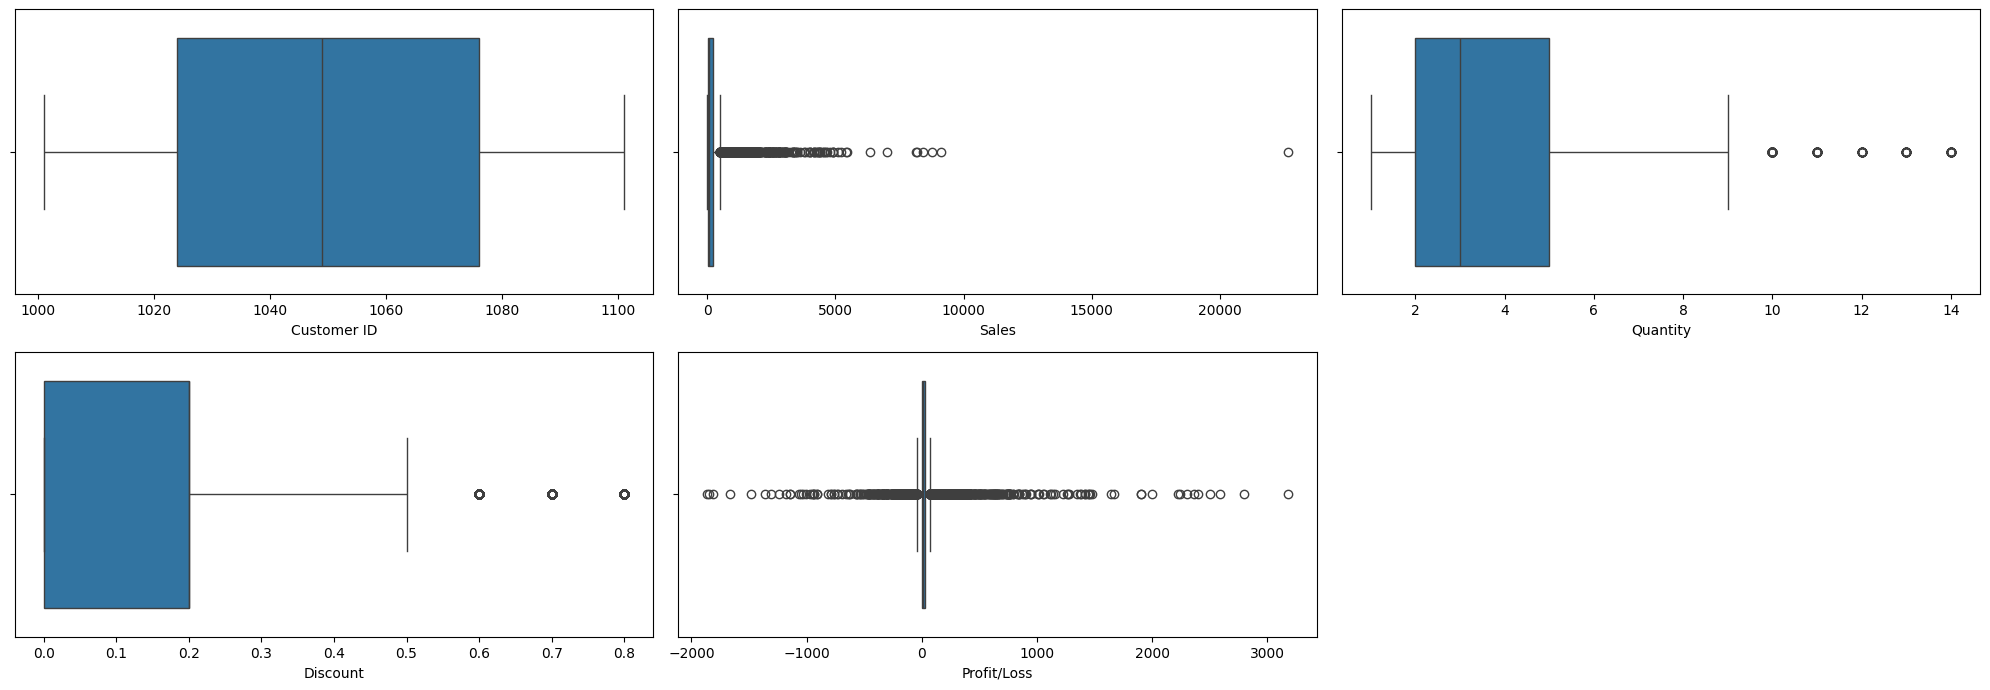

In [119]:
# Checking Boxplots again
plt.figure(figsize=(20,10))
pos = 1
for each in AnalysisSaaS.select_dtypes(include = 'number'):
  plt.subplot(3, 3, pos)
  sns.boxplot(data=AnalysisSaaS, x=each)
  pos += 1
  plt.tight_layout()

After re-assessing the outliers after removing the Profit/Loss outliers, I have decided to remove the top 8 Sales outliers on the grounds that they are isolated enough from the rest of the outliers.

In [120]:
TargetDropSales = AnalysisSaaS.sort_values(by='Sales', ascending=False).head(8).index
AnalysisSaaS.sort_values(by='Sales', ascending=False).head(10)

,Order Date,Contact Name,Country,City,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit/Loss
2697,2020-03-18,Diane Murray,Germany,Berlin,Anthem,1029,Healthcare,Enterprise,Big Ol Database,SGJPOTVE6H,22638.480,6,0.5,-1811.0784
4277,2022-04-17,Kevin Wilkins,Argentina,Buenos Aires,Lowes,1060,Retail,Strategic,Big Ol Database,N62XSQRABC,9099.930,7,0.0,2365.9818
8488,2022-02-02,Jane Stewart,Spain,Valencia,Honda Motor,1045,Manufacturing,SMB,Big Ol Database,3D2PQROYNM,8749.950,5,0.0,2799.9840
6425,2022-05-24,Alexander Langdon,France,Paris,BMW,1039,Manufacturing,SMB,Alchemy,C76HNU0077,8399.976,4,0.4,1119.9968
2505,2020-07-25,Trevor Langdon,United States,Los Angeles,Target,1085,Retail,SMB,Support,VW5YAKBYXO,8187.650,5,0.0,327.5060
165,2020-09-08,Melanie Davidson,Japan,Osaka,Nissan Motor,1098,Transportation,SMB,Big Ol Database,SKNAWPG4VV,8159.952,8,0.4,-1359.9920
6626,2020-12-14,Dan Allan,United Kingdom,London,Johnson & Johnson,1055,Healthcare,SMB,Big Ol Database,IWVABNLFJB,6999.960,4,0.0,2239.9872
509,2021-03-16,Eric Forsyth,Finland,Helsinki,Lukoil,1044,Energy,SMB,ContactMatcher,B8THW7YZWV,6354.950,5,0.0,3177.4750
6520,2023-01-17,Sophie Murray,Brazil,Rio de Janeiro,Alphabet,1053,Tech,SMB,ContactMatcher,EZE6LFNTH1,5443.960,4,0.0,2504.2216
7666,2022-10-05,Julian Short,Norway,Oslo,Glencore,1083,Misc,Enterprise,Alchemy,2SGM1W6IZA,5399.910,9,0.0,2591.9568


In [121]:
AnalysisSaaS.drop(TargetDropSales, inplace = True)

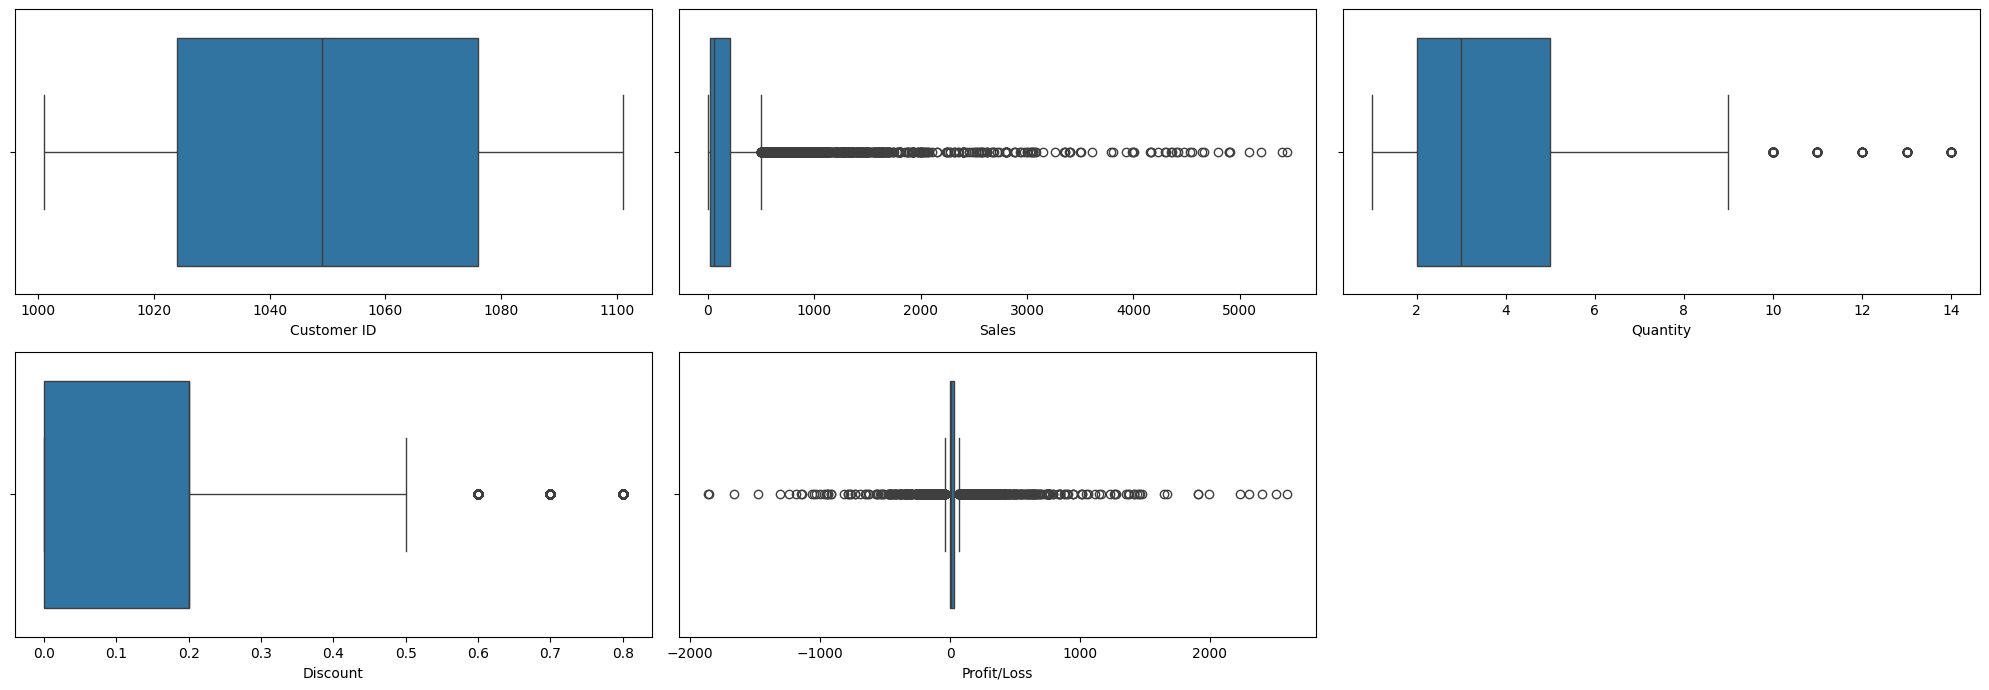

In [122]:
# Checking Boxplots one last time
plt.figure(figsize=(20,10))
pos = 1
for each in AnalysisSaaS.select_dtypes(include = 'number'):
  plt.subplot(3, 3, pos)
  sns.boxplot(data=AnalysisSaaS, x=each)
  pos += 1
  plt.tight_layout()

Now it looks good. Moving on to the Analysis Phase...

# Data Analysis Phase

In [123]:
#Before anything else, let's check the min and max date for this dataframe
AnalysisSaaS['Order Date'].min(), AnalysisSaaS['Order Date'].max()

(Timestamp('2020-01-04 00:00:00'), Timestamp('2023-12-31 00:00:00'))

## Checking Correlation

### Overall (Are the Discounts Working?)

<Axes: >

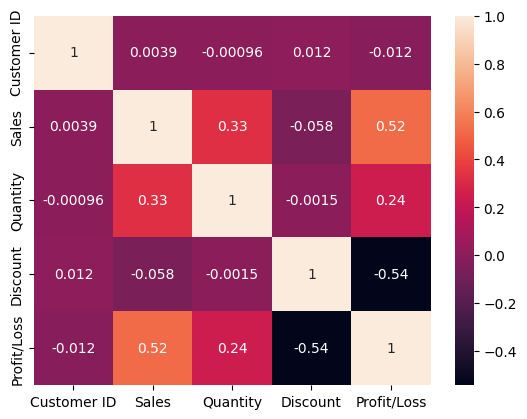

In [124]:
sns.heatmap(AnalysisSaaS.select_dtypes(include = 'number').corr(method='spearman'), annot=True)

Already we're seeing that increasing discounts will not increase sales or quantity while still lowering profits, generally speaking.

Going back to the amount of unique values in the Data Understanding Phase, we will focus on grouping the data by country and customer, given that there are enough unique values there to give maximum confidence on the correlations.

### Checking Point at Which Discounts Hurt Profits (Where do Discounts start hurting profits most of the time?)

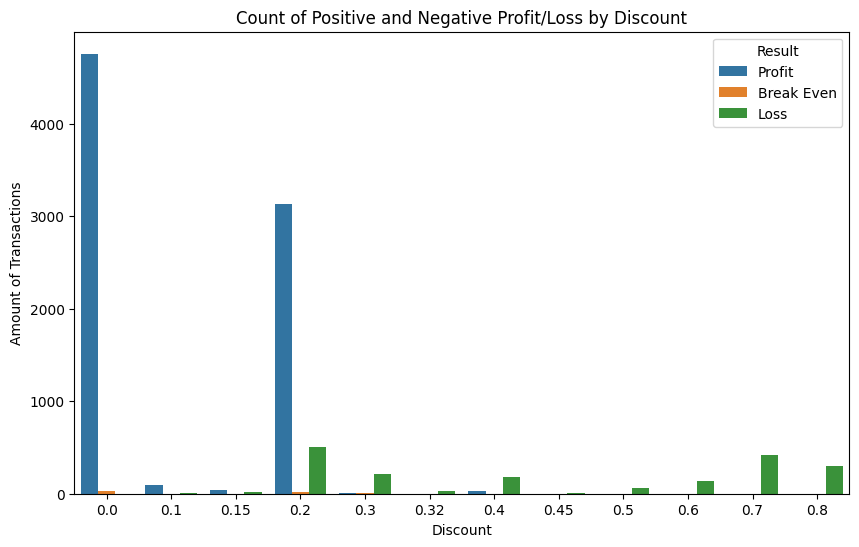

In [125]:
# Creating a new column to indicate profit, loss or break even
conditions = [
    AnalysisSaaS['Profit/Loss'] > 0,
    AnalysisSaaS['Profit/Loss'] < 0,
    AnalysisSaaS['Profit/Loss'] == 0
]

choices = ['Profit', 'Loss', 'Break Even']

AnalysisSaaS['Result'] = np.select(conditions, choices, default='Error')

# Creating count plot using seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=AnalysisSaaS, x='Discount', hue='Result')
plt.xlabel('Discount')
plt.ylabel('Amount of Transactions')
plt.title('Count of Positive and Negative Profit/Loss by Discount')
plt.show()

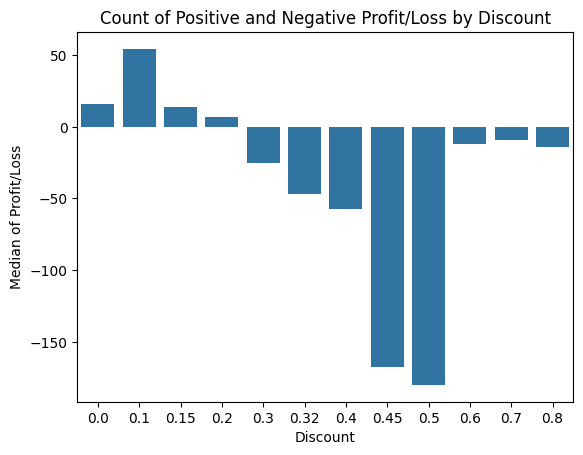

In [126]:
#Count median of profits per discount level
sns.barplot(data=AnalysisSaaS, x='Discount', y='Profit/Loss', estimator=np.median, errorbar=None)
plt.xlabel('Discount')
plt.ylabel('Median of Profit/Loss')
plt.title('Count of Positive and Negative Profit/Loss by Discount')
plt.show()

In [127]:
DiscountList = AnalysisSaaS.groupby(['Discount', 'Result'])['Result'].count().unstack(fill_value=0)
DiscountList.columns = ['Break Even', 'Loss', 'Profit']
DiscountList

,Break Even,Loss,Profit
Discount,,,
0.00,30,0,4758
0.10,0,4,90
0.15,0,17,35
0.20,22,502,3132
0.30,13,208,6
0.32,0,27,0
0.40,0,179,25
0.45,0,11,0
0.50,0,64,0


Even though not much data is there for the 10% and 15% discount levels, it can be said from here that the transactions stop being profitable at over 20% discount. While there are profitable transactions at the 40% discount level, it is overshadowed by the very high amount of transactions recording a loss.

### Where are we applying the most discounts? How is that affecting profits and number of sales?

#### Per Country

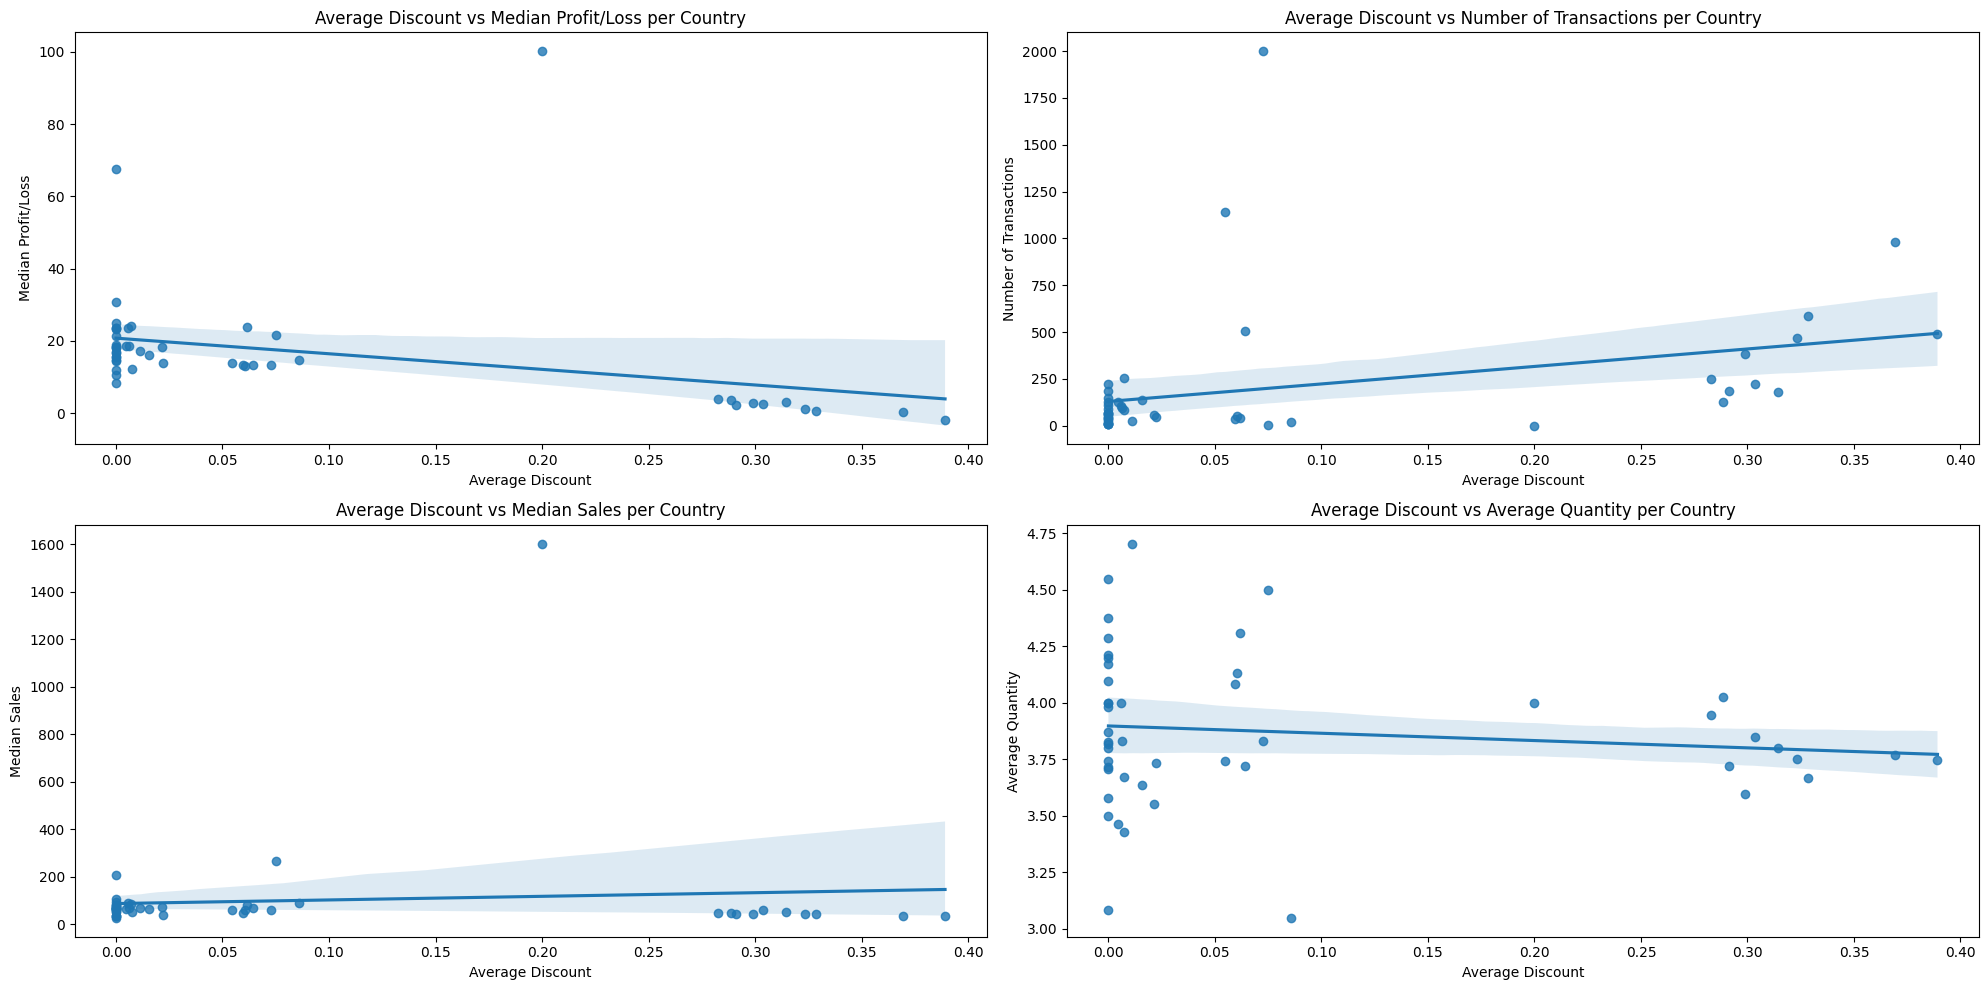

In [128]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
sns.regplot(data=AnalysisSaaS.groupby(['Country']).agg({'Discount':'mean','Profit/Loss':'median'}), x='Discount', y='Profit/Loss')
plt.xlabel('Average Discount')
plt.ylabel('Median Profit/Loss')
plt.title('Average Discount vs Median Profit/Loss per Country')
plt.subplot(2, 2, 2)
sns.regplot(data=AnalysisSaaS.groupby(['Country']).agg({'Discount':'mean','Sales':'count'}), x='Discount', y='Sales')
plt.xlabel('Average Discount')
plt.ylabel('Number of Transactions')
plt.title('Average Discount vs Number of Transactions per Country')
plt.subplot(2, 2, 3)
sns.regplot(data=AnalysisSaaS.groupby(['Country']).agg({'Discount':'mean','Sales':'median'}), x='Discount', y='Sales')
plt.xlabel('Average Discount')
plt.ylabel('Median Sales')
plt.title('Average Discount vs Median Sales per Country')
plt.subplot(2, 2, 4)
sns.regplot(data=AnalysisSaaS.groupby(['Country']).agg({'Discount':'mean','Quantity':'mean'}), x='Discount', y='Quantity')
plt.xlabel('Average Discount')
plt.ylabel('Average Quantity')
plt.title('Average Discount vs Average Quantity per Country')
plt.tight_layout()

In [129]:
AnalysisSaaS.groupby('Country').agg({'Profit/Loss':'median','Discount':'mean'}).sort_values(by='Profit/Loss', ascending = False).head(5)

,Profit/Loss,Discount
Country,,
Slovenia,100.19600,0.200000
Egypt,67.65990,0.000000
Denmark,30.73400,0.000000
Italy,25.10085,0.000000
Brazil,24.01680,0.007087


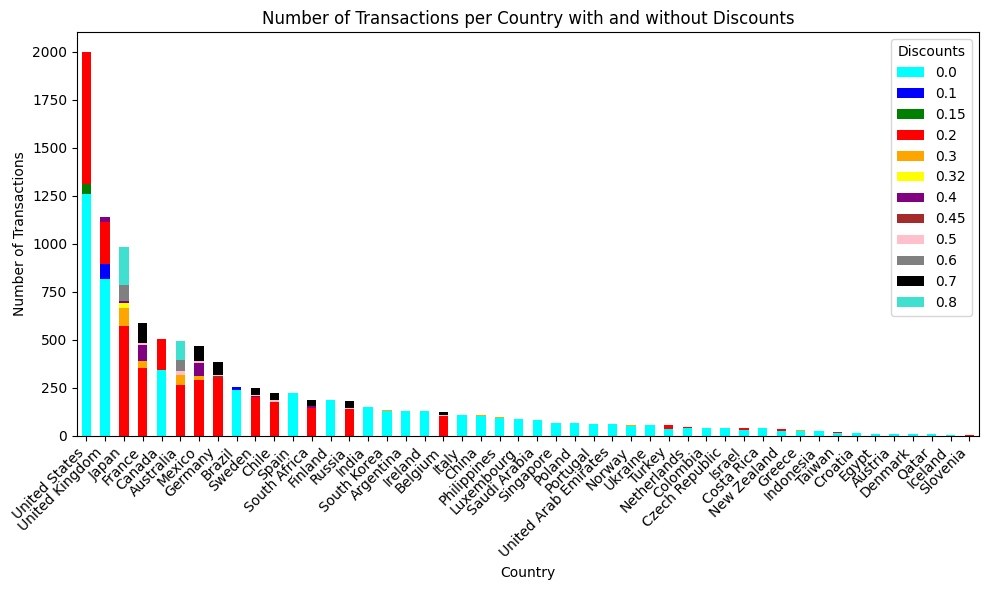

In [130]:
DiscountedTransactions = AnalysisSaaS.groupby(['Country', 'Discount'])['Sales'].count().unstack(fill_value=0)
DiscountedTransactions = DiscountedTransactions.rename_axis('Discounts', axis=1)
DiscountedTransactions['Total Transactions'] = DiscountedTransactions.sum(axis=1)
DiscountedTransactions = DiscountedTransactions.sort_values(by='Total Transactions', ascending=False)

colors = ['cyan', 'blue', 'green', 'red', 'orange', 'yellow', 'purple', 'brown', 'pink', 'gray', 'black', 'turquoise']

DiscountedTransactions.drop('Total Transactions', axis=1).plot(kind='bar', stacked=True, figsize=(10, 6), color = colors)
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions per Country with and without Discounts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

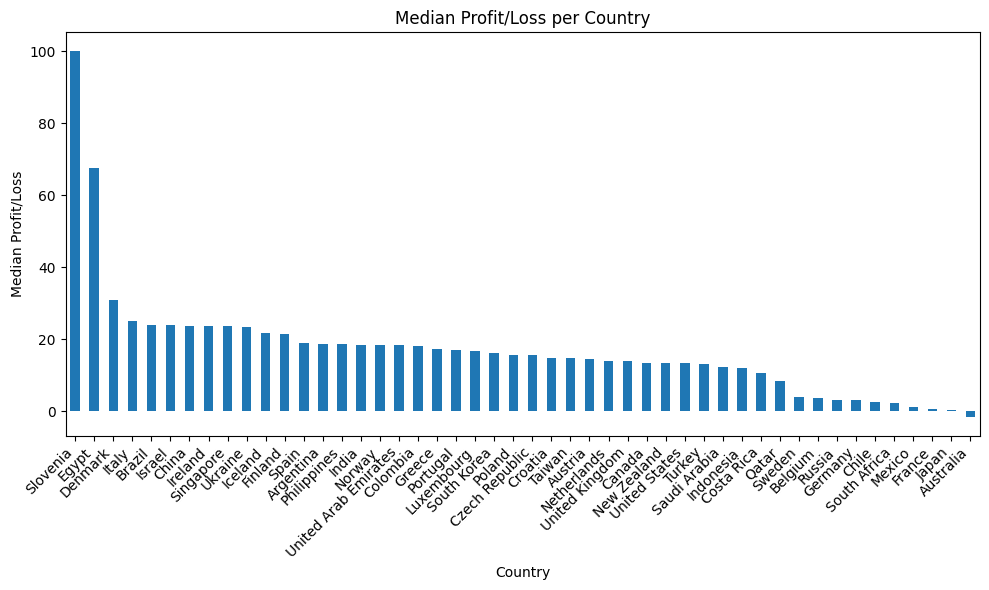

In [131]:
ProfitsPerCountry = AnalysisSaaS.groupby(['Country'])['Profit/Loss'].median().sort_values(ascending = False)

ProfitsPerCountry.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Country')
plt.ylabel('Median Profit/Loss')
plt.title('Median Profit/Loss per Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

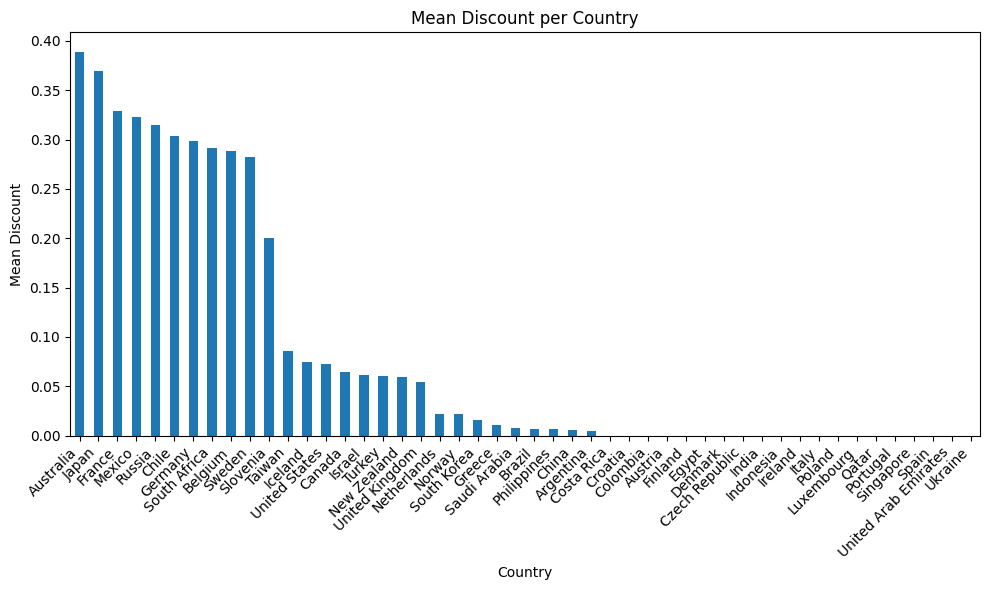

In [132]:
DiscountsPerCountry = AnalysisSaaS.groupby('Country')['Discount'].mean().sort_values(ascending = False)
DiscountsPerCountry.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Country')
plt.ylabel('Mean Discount')
plt.title('Mean Discount per Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [133]:
AnalysisSaaS.groupby('Country')['Discount'].mean().sort_values(ascending = False)

Country
Australia               0.389206
Japan                   0.369287
France                  0.328498
Mexico                  0.323340
Russia                  0.314365
Chile                   0.303571
Germany                 0.298822
South Africa            0.291257
Belgium                 0.288710
Sweden                  0.282661
Slovenia                0.200000
Taiwan                  0.085714
Iceland                 0.075000
United States           0.072800
Canada                  0.064158
Israel                  0.061538
Turkey                  0.060377
New Zealand             0.059459
United Kingdom          0.054609
Netherlands             0.022222
Norway                  0.021429
South Korea             0.015556
Greece                  0.011111
Saudi Arabia            0.007317
Brazil                  0.007087
Philippines             0.006316
China                   0.005714
Argentina               0.004651
Costa Rica              0.000000
Croatia                 0.000000
Co

In [134]:
AnalysisSaaS.groupby('Country')['Profit/Loss'].median().sort_values()

Country
Australia                -1.74400
Japan                     0.33380
France                    0.54685
Mexico                    1.25280
South Africa              2.33640
Chile                     2.53365
Germany                   2.93850
Russia                    3.18420
Belgium                   3.62880
Sweden                    3.99650
Qatar                     8.29440
Costa Rica               10.47770
Indonesia                11.96880
Saudi Arabia             12.18310
Turkey                   13.03750
United States            13.30455
New Zealand              13.34800
Canada                   13.42920
United Kingdom           13.79640
Netherlands              13.93920
Austria                  14.52720
Taiwan                   14.70000
Croatia                  14.85905
Czech Republic           15.65800
Poland                   15.66450
South Korea              16.10960
Luxembourg               16.79375
Portugal                 16.87500
Greece                   17.22000
Colomb

In [135]:
AnalysisSaaS[AnalysisSaaS['Country'] == 'Egypt']

,Order Date,Contact Name,Country,City,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit/Loss,Result
2234,2023-12-06,Pippa Hunter,Egypt,Cairo,Samsung Electronics,1015,Tech,Strategic,Data Smasher,T0U43N7WZ0,205.03,7,0.0,67.6599,Profit
5274,2021-11-07,Alexander Hill,Egypt,Cairo,Philip Morris International,1075,Consumer Products,SMB,FinanceHub,6MIT3WMKML,715.20,3,0.0,178.8000,Profit
8798,2022-04-07,Madeleine Smith,Egypt,Cairo,BMW,1039,Manufacturing,Enterprise,Site Analytics,VF0PL4R7UY,1294.75,5,0.0,336.6350,Profit
9146,2022-01-23,Felicity King,Egypt,Cairo,CVS Health,1026,Retail,Strategic,Data Smasher,LCLRT65YV7,99.98,2,0.0,42.9914,Profit
9147,2022-01-23,Felicity King,Egypt,Cairo,CVS Health,1026,Retail,Strategic,ChatBot Plugin,JCHH1VW2I7,8.04,6,0.0,2.7336,Profit
9148,2022-01-23,Felicity King,Egypt,Cairo,CVS Health,1026,Retail,Strategic,Marketing Suite - Gold,YPU02KGNRF,1564.29,13,0.0,406.7154,Profit
9386,2023-01-20,Sean Morrison,Egypt,Cairo,News Corp.,1071,Misc,SMB,Support,GZDB8X8BGF,79.92,4,0.0,37.5624,Profit
9387,2023-01-20,Sean Morrison,Egypt,Cairo,News Corp.,1071,Misc,SMB,Support,148ALD3CHM,12.28,1,0.0,5.7716,Profit
9388,2023-01-20,Sean Morrison,Egypt,Cairo,News Corp.,1071,Misc,SMB,OneView,QXY81KQ2EV,542.94,3,0.0,152.0232,Profit
9389,2023-01-20,Sean Morrison,Egypt,Cairo,News Corp.,1071,Misc,SMB,SaaS Connector Pack - Gold,NDWM70GA20,2.04,1,0.0,0.9588,Profit


In [136]:
MeanAmountOfTransactions = AnalysisSaaS.groupby('Country')['Sales'].count()
MeanAmountOfTransactions.median()

np.float64(85.0)

Two outliers can be seen here: Slovenia and Egypt.
- The highest point on the scatterplot is from Slovenia. Only one transaction happened in Slovenia, so this could be a fluke.
- Egypt is harder to ignore here, however. While only 11 transactions are recorded there, less than the median number of transactions per country, none of them were given discounts and yet profits remain quite high.

It can also be seen that, wherever all of the transactions in a country are discounted, it eats into the profits: all the countries that demonstrate this are in the bottom 10 in median profits.

#### Per Customer

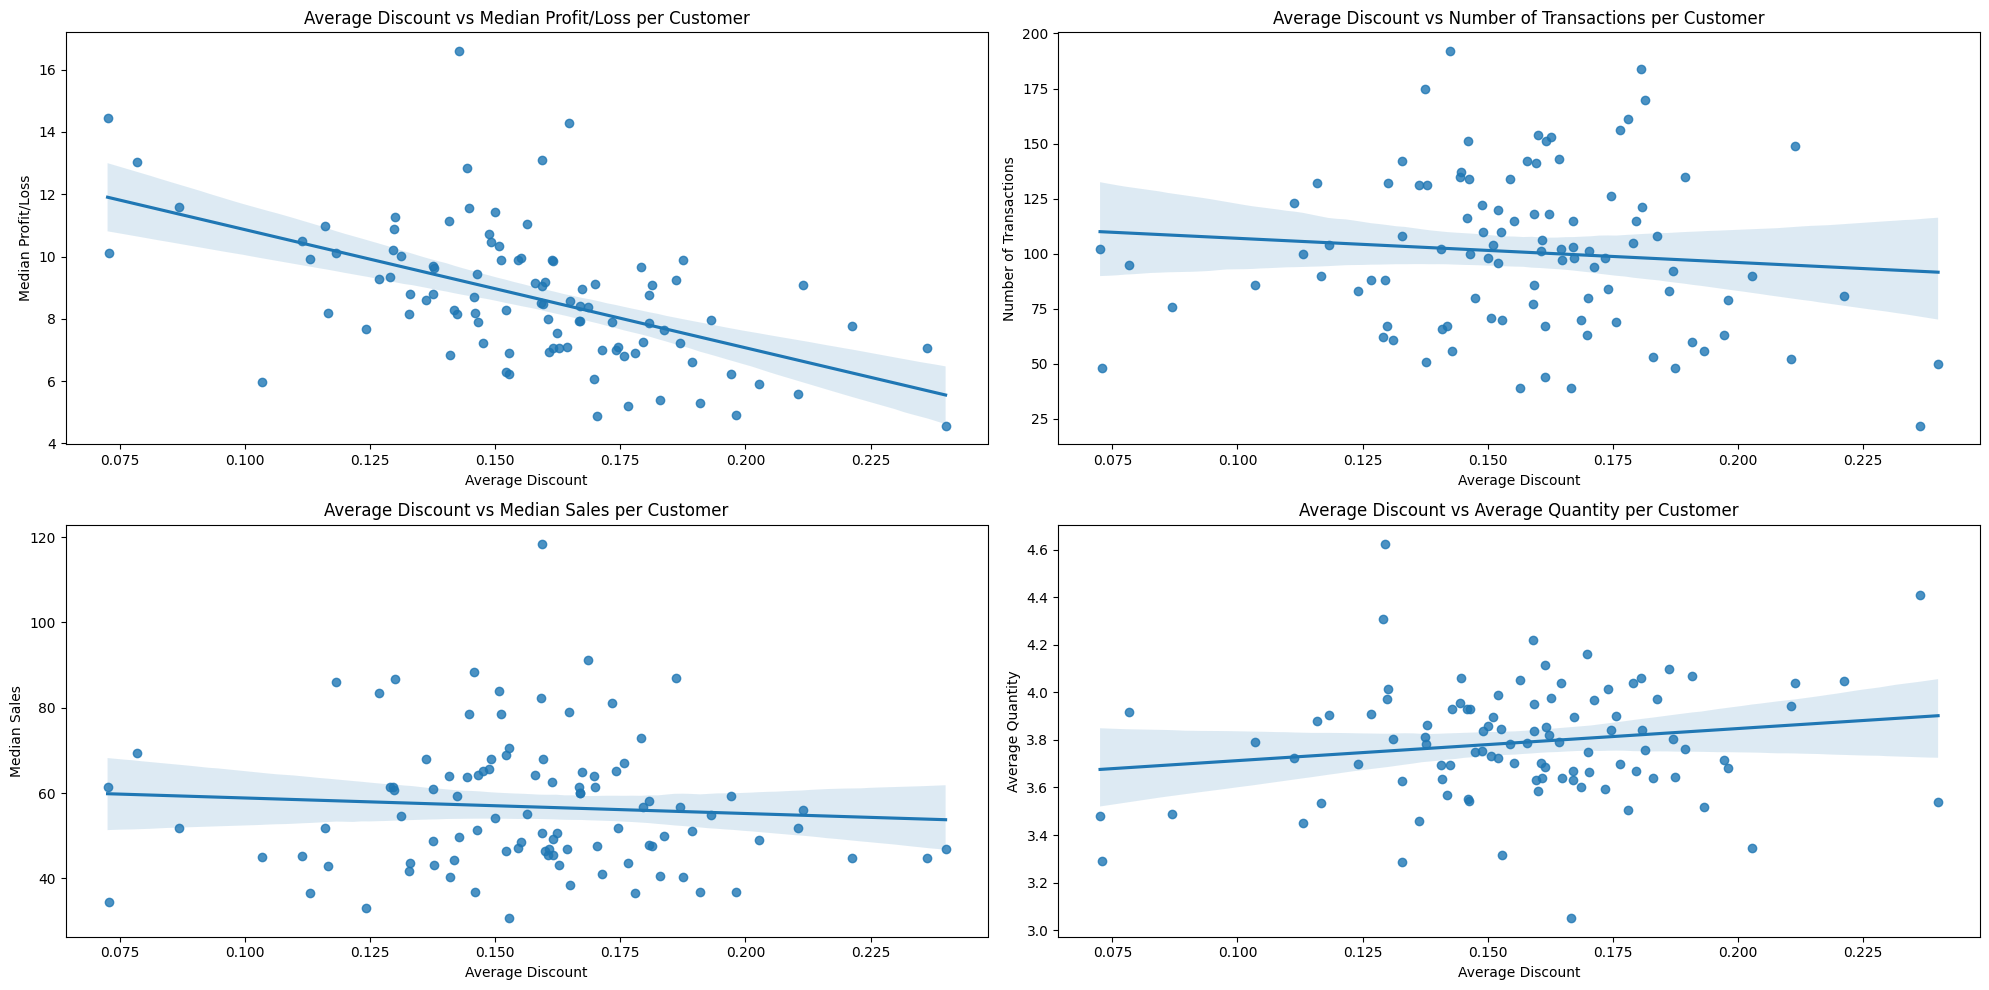

In [137]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
sns.regplot(data=AnalysisSaaS.groupby(['Customer']).agg({'Discount':'mean','Profit/Loss':'median'}), x='Discount', y='Profit/Loss')
plt.xlabel('Average Discount')
plt.ylabel('Median Profit/Loss')
plt.title('Average Discount vs Median Profit/Loss per Customer')
plt.subplot(2, 2, 2)
sns.regplot(data=AnalysisSaaS.groupby(['Customer']).agg({'Discount':'mean','Sales':'count'}), x='Discount', y='Sales')
plt.xlabel('Average Discount')
plt.ylabel('Number of Transactions')
plt.title('Average Discount vs Number of Transactions per Customer')
plt.subplot(2, 2, 3)
sns.regplot(data=AnalysisSaaS.groupby(['Customer']).agg({'Discount':'mean','Sales':'median'}), x='Discount', y='Sales')
plt.xlabel('Average Discount')
plt.ylabel('Median Sales')
plt.title('Average Discount vs Median Sales per Customer')
plt.subplot(2, 2, 4)
sns.regplot(data=AnalysisSaaS.groupby(['Customer']).agg({'Discount':'mean','Quantity':'mean'}), x='Discount', y='Quantity')
plt.xlabel('Average Discount')
plt.ylabel('Average Quantity')
plt.title('Average Discount vs Average Quantity per Customer')
plt.tight_layout()

In [138]:
AnalysisSaaS.groupby('Customer').agg({'Profit/Loss':'median','Discount':'mean'}).sort_values(by='Profit/Loss', ascending = False).head(5)

,Profit/Loss,Discount
Customer,,
Glencore,16.5939,0.142857
Trafigura Group,14.4322,0.072549
Fannie Mae,14.2878,0.164706
Caterpillar,13.0869,0.159302
Home Depot,13.0284,0.078421


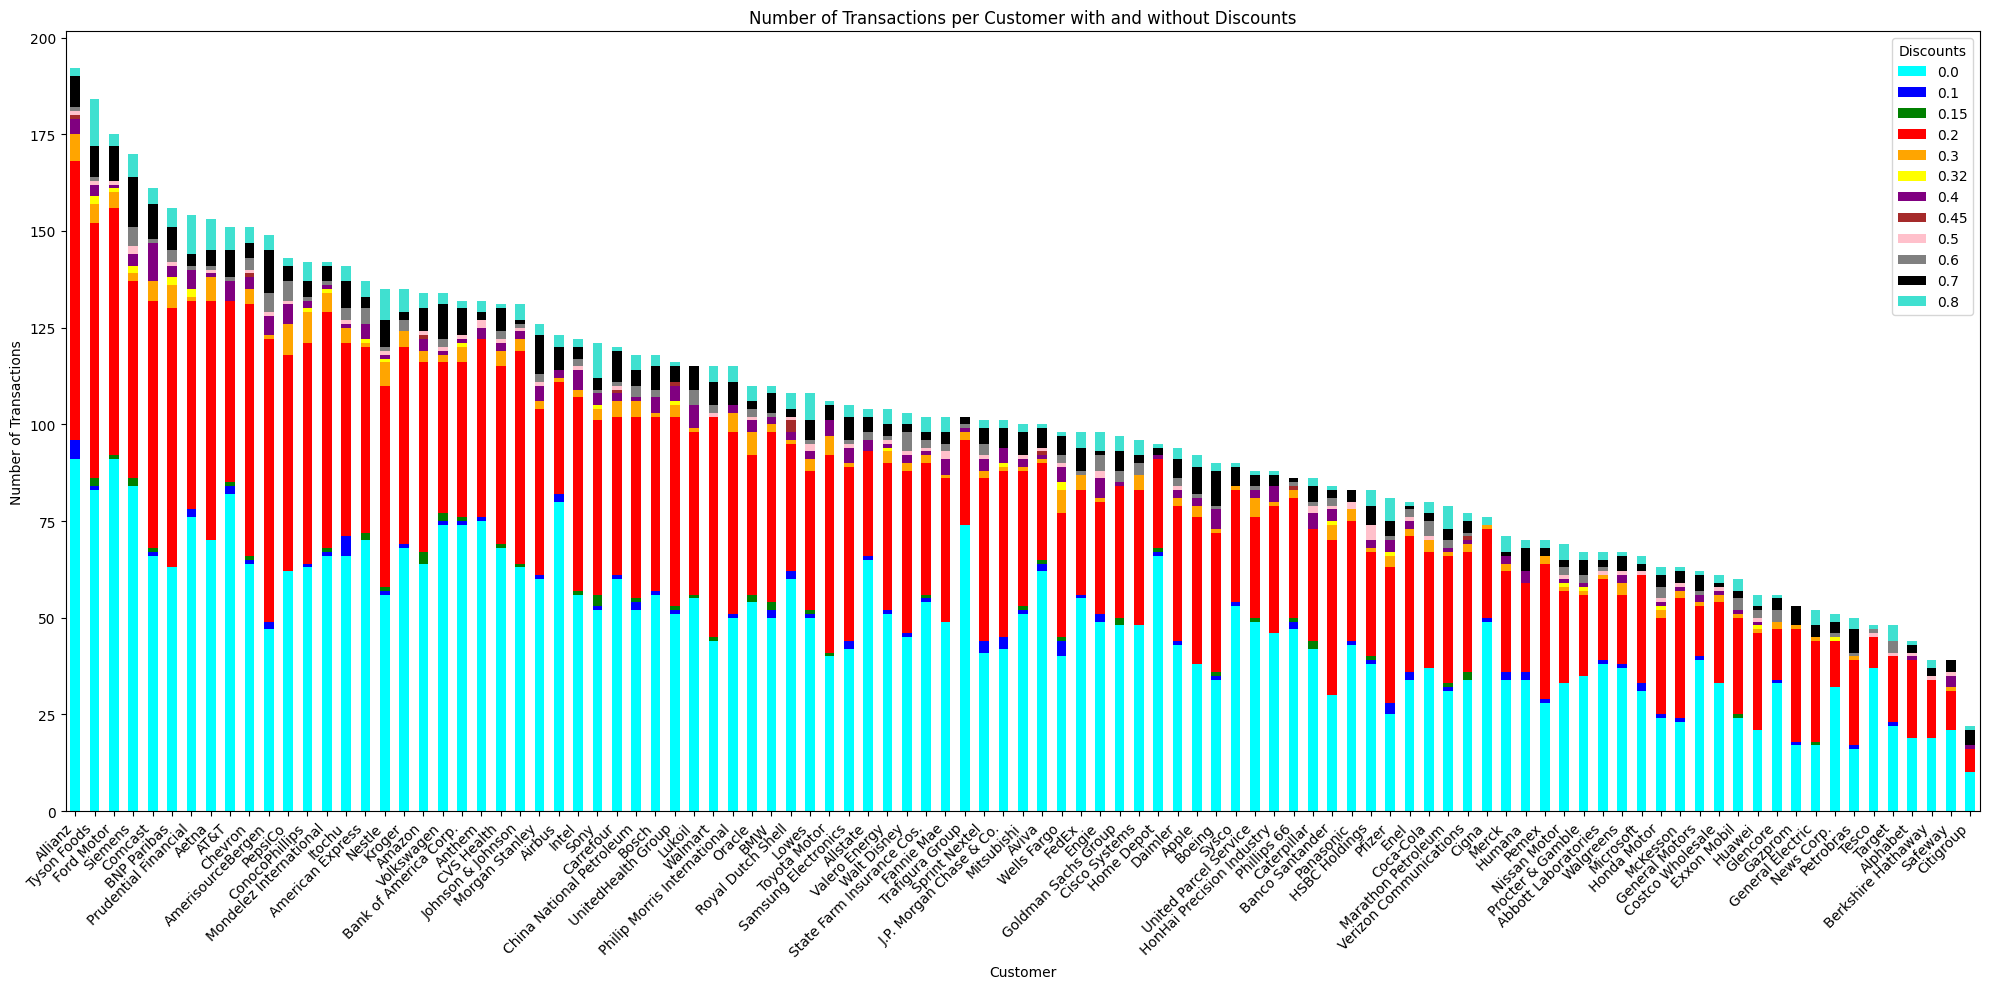

In [139]:
DiscountedTransactionsCustomer = AnalysisSaaS.groupby(['Customer', 'Discount'])['Sales'].count().unstack(fill_value=0)
DiscountedTransactionsCustomer = DiscountedTransactionsCustomer.rename_axis('Discounts', axis=1)
DiscountedTransactionsCustomer['Total Transactions'] = DiscountedTransactionsCustomer.sum(axis=1)
DiscountedTransactionsCustomer = DiscountedTransactionsCustomer.sort_values(by='Total Transactions', ascending=False)

colors = ['cyan', 'blue', 'green', 'red', 'orange', 'yellow', 'purple', 'brown', 'pink', 'gray', 'black', 'turquoise']

DiscountedTransactionsCustomer.drop('Total Transactions', axis=1).plot(kind='bar', stacked=True, figsize=(20, 10), color = colors)
plt.xlabel('Customer')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions per Customer with and without Discounts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

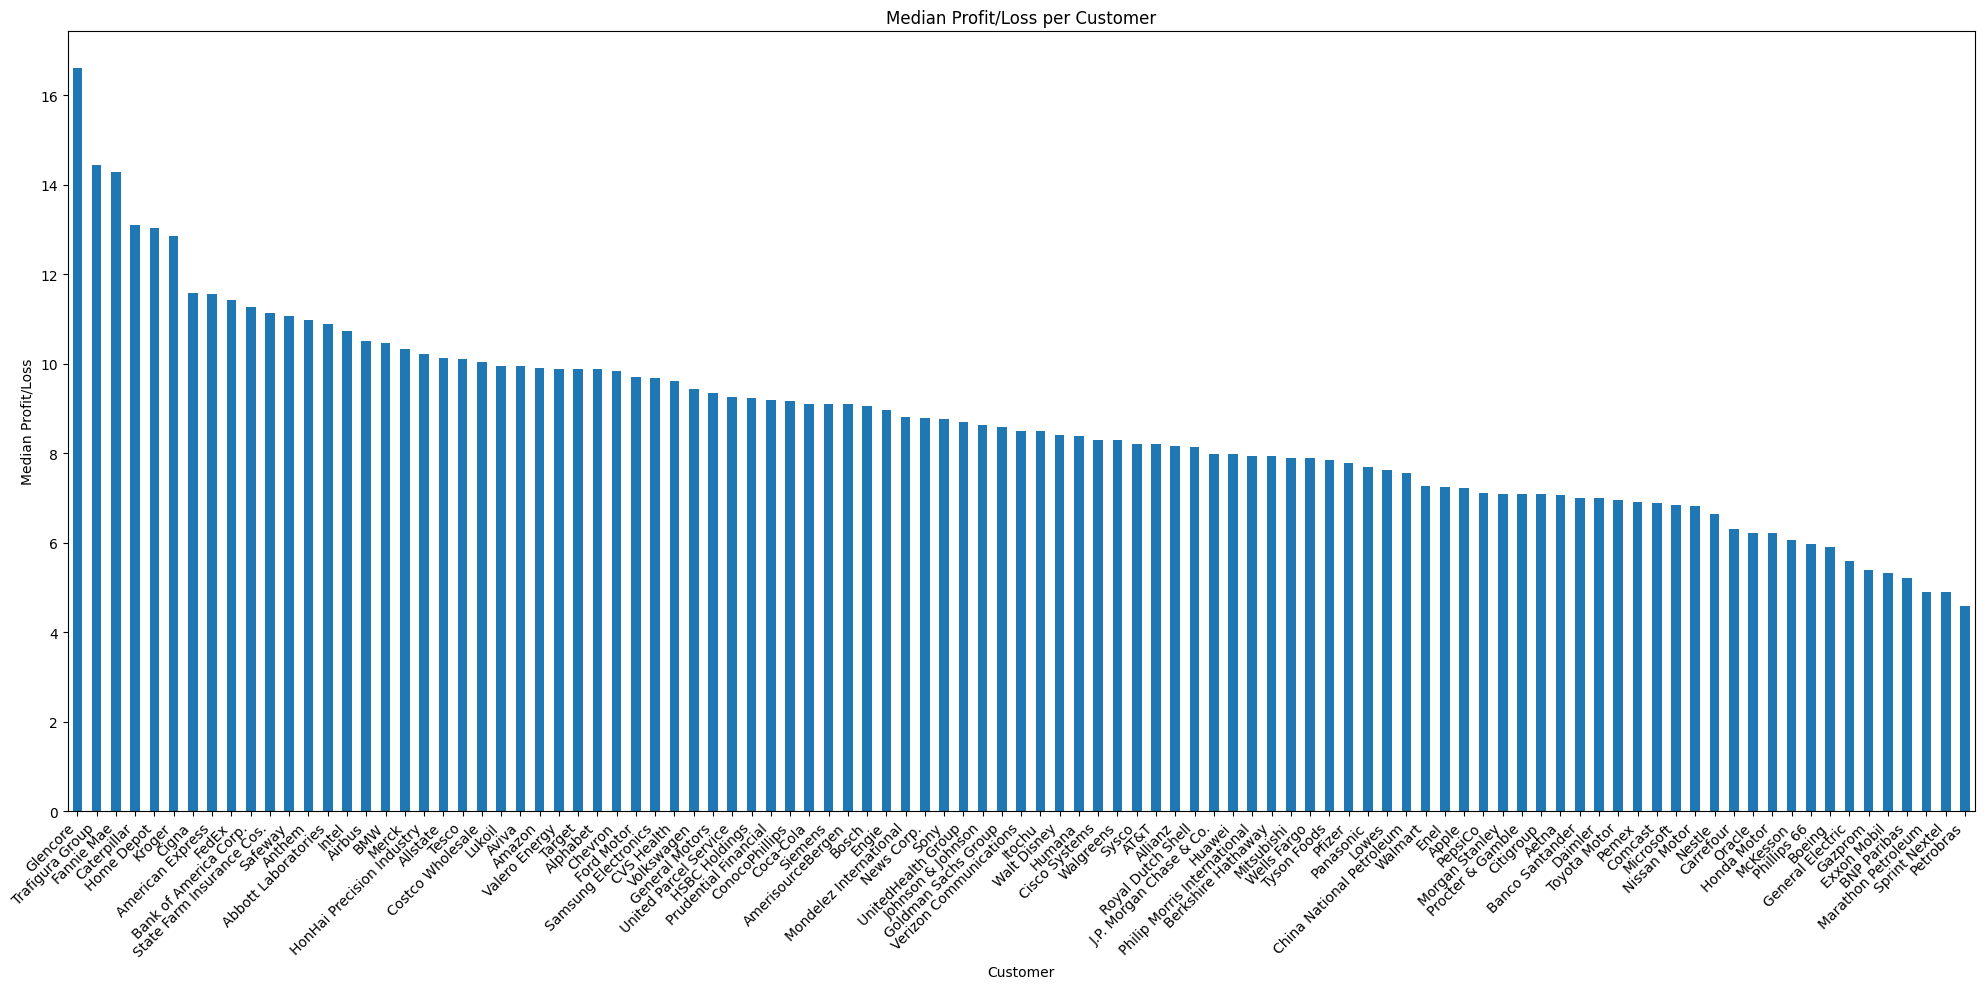

In [140]:
ProfitsPerCustomer = AnalysisSaaS.groupby(['Customer'])['Profit/Loss'].median().sort_values(ascending = False)

ProfitsPerCustomer.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.xlabel('Customer')
plt.ylabel('Median Profit/Loss')
plt.title('Median Profit/Loss per Customer')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [141]:
AnalysisSaaS.groupby(['Customer'])['Profit/Loss'].median().sort_values()

Customer
Petrobras              4.5774
Sprint Nextel          4.8924
Marathon Petroleum     4.8986
BNP Paribas            5.2074
Exxon Mobil            5.3148
                       ...   
Home Depot            13.0284
Caterpillar           13.0869
Fannie Mae            14.2878
Trafigura Group       14.4322
Glencore              16.5939
Name: Profit/Loss, Length: 99, dtype: float64

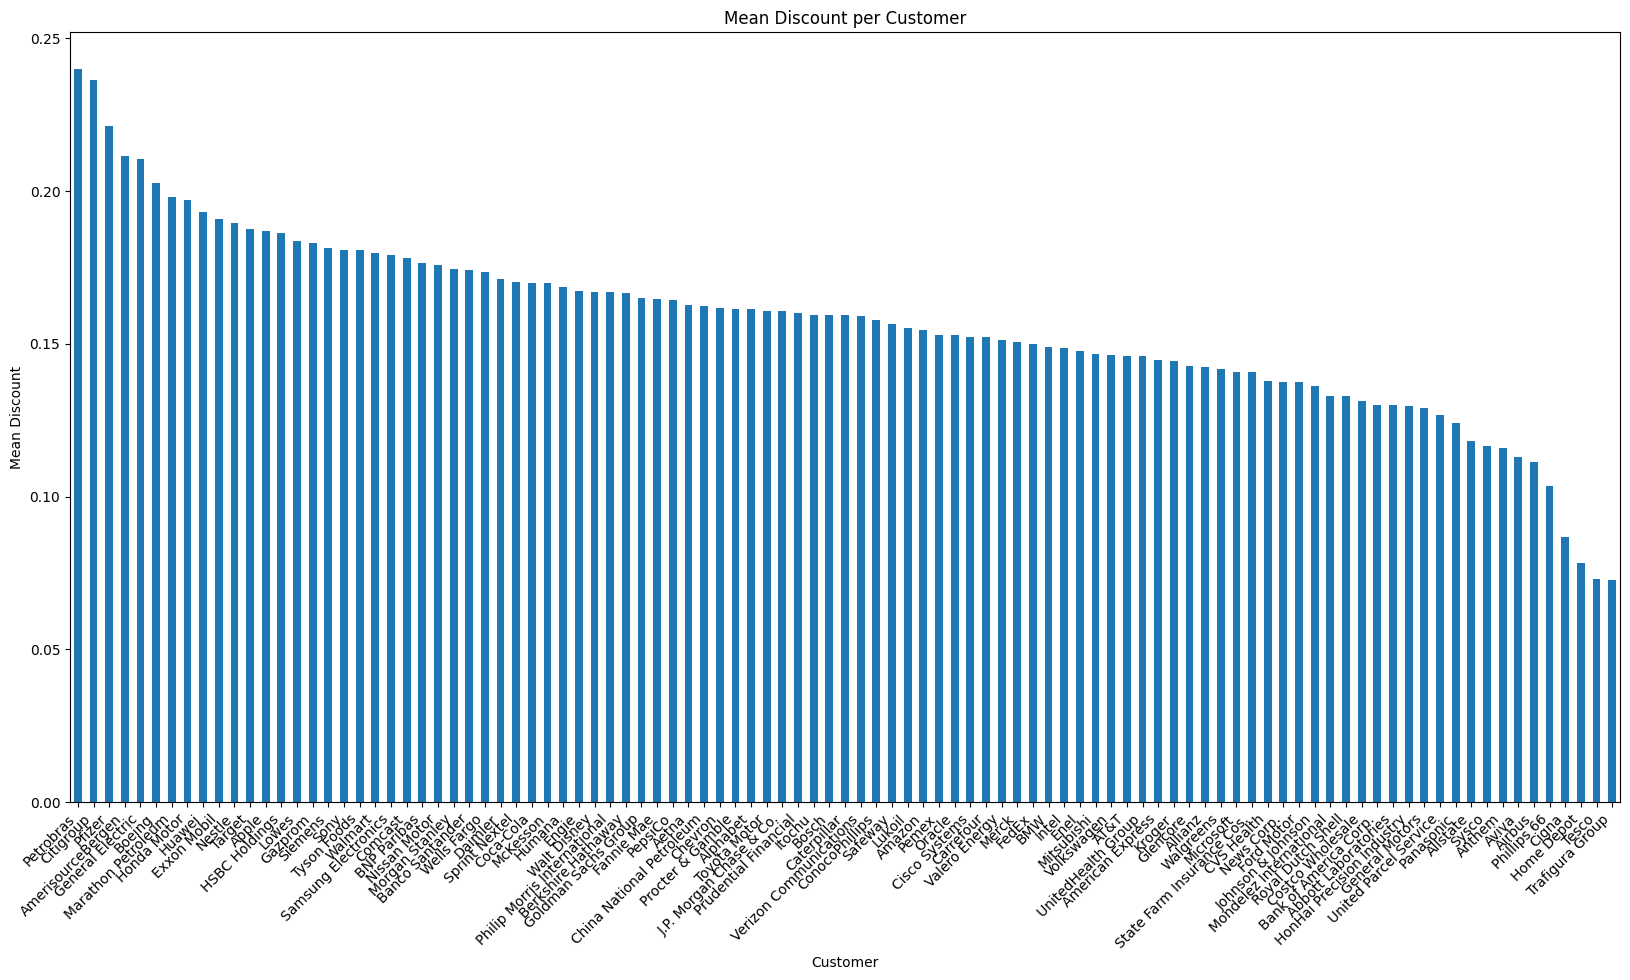

In [142]:
DiscountsPerCustomer = AnalysisSaaS.groupby('Customer')['Discount'].mean().sort_values(ascending = False)

DiscountsPerCustomer.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.xlabel('Customer')
plt.ylabel('Mean Discount')
plt.title('Mean Discount per Customer')
plt.xticks(rotation=45, ha='right')
plt.show()

In [143]:
AnalysisSaaS.groupby('Customer')['Discount'].mean().sort_values(ascending = False)

Customer
Petrobras            0.240000
Citigroup            0.236364
Pfizer               0.221235
AmerisourceBergen    0.211409
General Electric     0.210577
                       ...   
Phillips 66          0.103488
Cigna                0.086842
Home Depot           0.078421
Tesco                0.072917
Trafigura Group      0.072549
Name: Discount, Length: 99, dtype: float64

It seems that a lot of the outliers in terms of Profit/Loss are either around the 15% discount mark or the 7.5% discount mark, both well within 20% discount. Perhaps discounts were able to seal the deal with these especially profitable companies.

Assuming that they are very satisfied with our product, it may be worth reducing the average discounts given to them to see if we can squeeze more value from them.

As for distribution of discounted transactions per customer, we can see again that, the more discounts we put onto these customers, the lower the profits we get from them, but the effect is not as strong as can be seen with the countries because the difference between average discounts here aren't as large.

# What is to be Done?

- Cease using discounts above 20% by the end of 2024.
 - Cease offering discounts above 40% with immediate effect.
 - For customers acclimated to discounts between 20% and 40%, try to bring the average discount levels to below 20% by the end of 2024, and below 10% by the end of 2025.
- Reach 25% of transactions given discounts in Japan, France, Australia, Mexico, Germany, Sweden, Chile, South Africa, Russia and Belgium by end of 2024, instead of 100% according to this data.
 - If discounts must be offered, the maximum discount offered should be 20%.
- Where there are no discounts but profits remain high, try marketing in those places more, such as Egypt:

In [144]:
AnalysisSaaS[AnalysisSaaS['Country'] == 'Egypt']

,Order Date,Contact Name,Country,City,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit/Loss,Result
2234,2023-12-06,Pippa Hunter,Egypt,Cairo,Samsung Electronics,1015,Tech,Strategic,Data Smasher,T0U43N7WZ0,205.03,7,0.0,67.6599,Profit
5274,2021-11-07,Alexander Hill,Egypt,Cairo,Philip Morris International,1075,Consumer Products,SMB,FinanceHub,6MIT3WMKML,715.20,3,0.0,178.8000,Profit
8798,2022-04-07,Madeleine Smith,Egypt,Cairo,BMW,1039,Manufacturing,Enterprise,Site Analytics,VF0PL4R7UY,1294.75,5,0.0,336.6350,Profit
9146,2022-01-23,Felicity King,Egypt,Cairo,CVS Health,1026,Retail,Strategic,Data Smasher,LCLRT65YV7,99.98,2,0.0,42.9914,Profit
9147,2022-01-23,Felicity King,Egypt,Cairo,CVS Health,1026,Retail,Strategic,ChatBot Plugin,JCHH1VW2I7,8.04,6,0.0,2.7336,Profit
9148,2022-01-23,Felicity King,Egypt,Cairo,CVS Health,1026,Retail,Strategic,Marketing Suite - Gold,YPU02KGNRF,1564.29,13,0.0,406.7154,Profit
9386,2023-01-20,Sean Morrison,Egypt,Cairo,News Corp.,1071,Misc,SMB,Support,GZDB8X8BGF,79.92,4,0.0,37.5624,Profit
9387,2023-01-20,Sean Morrison,Egypt,Cairo,News Corp.,1071,Misc,SMB,Support,148ALD3CHM,12.28,1,0.0,5.7716,Profit
9388,2023-01-20,Sean Morrison,Egypt,Cairo,News Corp.,1071,Misc,SMB,OneView,QXY81KQ2EV,542.94,3,0.0,152.0232,Profit
9389,2023-01-20,Sean Morrison,Egypt,Cairo,News Corp.,1071,Misc,SMB,SaaS Connector Pack - Gold,NDWM70GA20,2.04,1,0.0,0.9588,Profit


Or if we want to find out where to best add discounts later if we still want to use that tactic, we can refer to the outlier customers as below:

In [145]:
AnalysisSaaS.groupby('Customer').agg({'Profit/Loss':'median','Discount':'mean'}).sort_values(by='Profit/Loss', ascending = False).head(5)

,Profit/Loss,Discount
Customer,,
Glencore,16.5939,0.142857
Trafigura Group,14.4322,0.072549
Fannie Mae,14.2878,0.164706
Caterpillar,13.0869,0.159302
Home Depot,13.0284,0.078421


Analyze the following details for these companies:
- Where the sales and losses come from
- Our current relations with these companies
- How satisfied they are with our products

Ask them the following questions:
- What part of our product (including discounts and other deals) sealed the deal for you?
- Think back to the time before you bought our product. Would you have bought it if there was no discount?
- Would you be willing to stick with our products if we lowered the discounts in the future?



# Dataframe Post-Processing (Downloadable)

In [147]:
!pip install openpyxl==3.0.10
AnalysisSaaS.to_excel('AnalysisSaaS.xlsx')


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


The Analysis continues in the Tableau Public dashboard.